In [1]:
from selenium.webdriver.chrome.service import Service

In [2]:
service = Service('C:/bin\chromedriver')
service.start()

In [3]:
from selenium import webdriver

In [4]:
driver = webdriver.Remote(service.service_url)

In [5]:
driver.get('https://www.indeed.com/')

In [6]:
elem = driver.find_element('id','text-input-what')

In [7]:
elem.clear()

In [8]:
elem.send_keys('Data Scientist')

In [9]:
from selenium.webdriver.common.keys import Keys

In [10]:
elem.send_keys(Keys.RETURN)

In [11]:
print(driver.current_url)

https://www.indeed.com/jobs?q=Data%20Scientist&l=Sugar%20Land%2C%20TX&from=searchOnHP


In [12]:
import requests
import bs4

'<!DOCTYPE html>\n<html lang="en-US">\n   <head>\n      <title>Access denied</title>\n      <meta http-equiv="X-UA-Compatible" content="IE=Edge" />\n      <meta name="robots" content="noindex, nofollow" />\n      <meta name="viewport" content="width=device-width,initial-scale=1" />\n      <link rel="stylesheet" href="/cdn-cgi/styles/errors.css" media="screen" />\n      <script>\n(function(){if(document.addEventListener&&window.XMLHttpRequest&&JSON&&JSON.stringify){var e=function(a){var c=document.getElementById("error-feedback-survey"),d=document.getElementById("error-feedback-success"),b=new XMLHttpRequest;a={event:"feedback clicked",properties:{errorCode:1020,helpful:a,version:5}};b.open("POST","https://sparrow.cloudflare.com/api/v1/event");b.setRequestHeader("Content-Type","application/json");b.setRequestHeader("Sparrow-Source-Key","c771f0e4b54944bebf4261d44bd79a1e");\nb.send(JSON.stringify(a));c.classList.add("feedback-hidden");d.classList.remove("feedback-hidden")};document.addEve
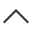

In [13]:
res = requests.get(driver.current_url)
res.text

In [14]:
user_agent = "Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.88 Safari/537.37"
res2 = requests.get(driver.current_url, headers={'User-Agent': user_agent})
res2.text

'<!DOCTYPE html>\n<html lang="en-US">\n<head>\n    <title>Just a moment...</title>\n    <meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=Edge">\n    <meta name="robots" content="noindex,nofollow">\n    <meta name="viewport" content="width=device-width,initial-scale=1">\n    <link href="/cdn-cgi/styles/challenges.css" rel="stylesheet">\n    \n\n</head>\n<body class="no-js">\n    <div class="main-wrapper" role="main">\n    <div class="main-content">\n        <h1 class="zone-name-title h1">\n            <img class="heading-favicon" src="/favicon.ico"\n                 onerror="this.onerror=null;this.parentNode.removeChild(this)">\n            www.indeed.com\n        </h1>\n        <h2 class="h2" id="challenge-running">\n            Checking if the site connection is secure\n        </h2>\n        <noscript>\n            <div id="challenge-error-title">\n                <div class="h2">\n                    <span class=

In [15]:
soup = bs4.BeautifulSoup(res2.content, 'lxml')
print(soup.prettify())  

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <title>
   Just a moment...
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="noindex,nofollow" name="robots"/>
  <meta content="width=device-width,initial-scale=1" name="viewport"/>
  <link href="/cdn-cgi/styles/challenges.css" rel="stylesheet"/>
 </head>
 <body class="no-js">
  <div class="main-wrapper" role="main">
   <div class="main-content">
    <h1 class="zone-name-title h1">
     <img class="heading-favicon" onerror="this.onerror=null;this.parentNode.removeChild(this)" src="/favicon.ico"/>
     www.indeed.com
    </h1>
    <h2 class="h2" id="challenge-running">
     Checking if the site connection is secure
    </h2>
    <noscript>
     <div id="challenge-error-title">
      <div class="h2">
       <span class="icon-wrapper">
        <div class="heading-icon warning-icon">
        </div>
       </span>
       <span id="challenge

In [16]:
# alternative way
# soup2 = bs4.BeautifulSoup(res.text,"html.parser")
# soup2

In [17]:
jobs = soup.find('li', class_='job_seen_beacon')
print(jobs.h2)

AttributeError: 'NoneType' object has no attribute 'h2'

In [ ]:
# from urllib.request import urlopen
# html = urlopen(driver.current_url)    doesn't work, returns "HTTP Error 403: Forbidden", requests.get is preferable

In [ ]:
# updated your code to send a user-agent along with the request
# also suggest adding a delay/sleep between requests, 30-45 seconds is a good amount